In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Data Generate X, Y

In [2]:
def generateDataSet(m):
    x = np.random.randn(m) * 10  # -10 - 10
    # print(x.mean(), x.std())
    noise = np.random.randn(m)
    y = 3 * x + 1 + 4 * noise
    return x, y

In [3]:
x,y = generateDataSet(100)
print(x.shape, y.shape)
# x

(100,) (100,)


In [4]:
def plotData(x, y, color="orange", title="Data"):
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(x, y, c=color)
    plt.show()

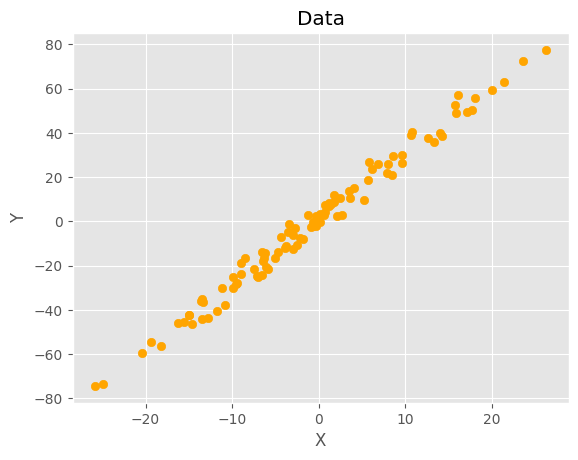

In [5]:
plotData(x, y)

In [6]:
def normaliseData(X):
    X = (X - X.mean()) / X.std()
    return X

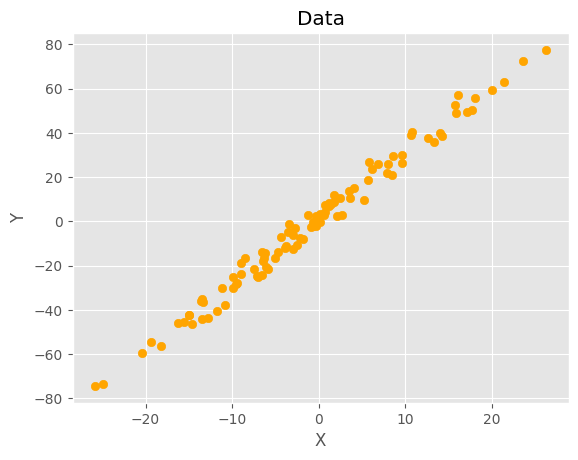

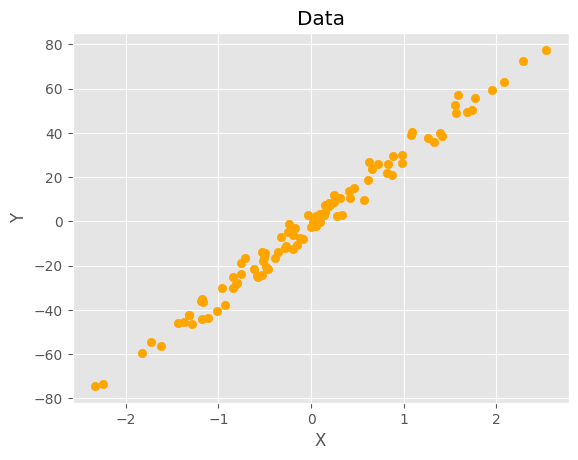

In [7]:
plotData(x, y)
x = normaliseData(x)  # Data region ranges between -1 to 1
plotData(x, y)

In [8]:
# Creating Test Set
def trainTestSplit(x, y, split=0.8):
    m = x.shape[0]
    data = np.zeros((m, 2))
    
    data[:, 0] = x
    data[:, 1] = y
    
    np.random.shuffle(data)
    
    split = int(m*split)
    
    #Train
    XT = data[:split, 0]  #0-79
    YT = data[:split, 1]
    
    #Test
    Xt = data[split: , 0]
    Yt = data[split: , 1]
    
    return XT, YT, Xt, Yt

In [9]:
XT, YT, Xt, Yt = trainTestSplit(x, y)

In [10]:
print(XT.shape, YT.shape)  # Train
print(Xt.shape, Yt.shape)  # Test

(80,) (80,)
(20,) (20,)


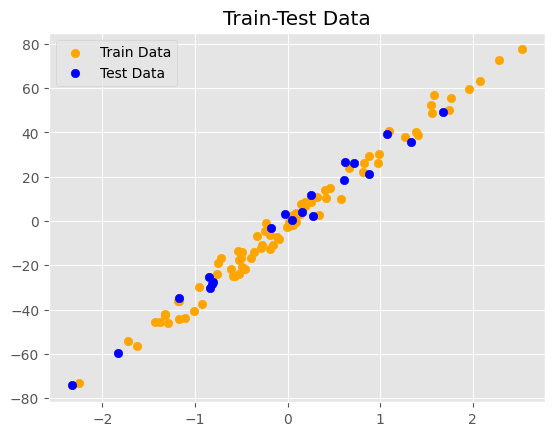

In [11]:
plt.scatter(XT, YT, color='orange', label="Train Data")
plt.scatter(Xt, Yt, color='blue', label="Test Data")
plt.title("Train-Test Data")
plt.legend()
plt.show()

In [12]:
# Hypothesis
def hypothesis(x, theta):
    return theta[0] + theta[1] * x

def error(x, y, theta):
    m = x.shape[0]
    e = 0
    for i in range(m):
        y_i = hypothesis(x[i], theta)
        e = e + (y[i] - y_i) ** 2
        
    return e / (2 * m)

def gradient(x, y, theta):
    m = x.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        exp = hypothesis(x[i], theta) - y[i]
        grad[0] += (exp)
        grad[1] += (exp) * x[i]
    
    return grad / m

def train(x, y, learning_rate = 0.1, maxItrs = 100):
    theta = np.zeros((2, ))
    error_list = []
    
    for i in range(maxItrs):
        grad = gradient(x, y, theta)
        error_list.append(error(x, y, theta))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
        
    plt.xlabel("Iteration Number")
    plt.ylabel("Loss")
    plt.plot(error_list)
    return theta

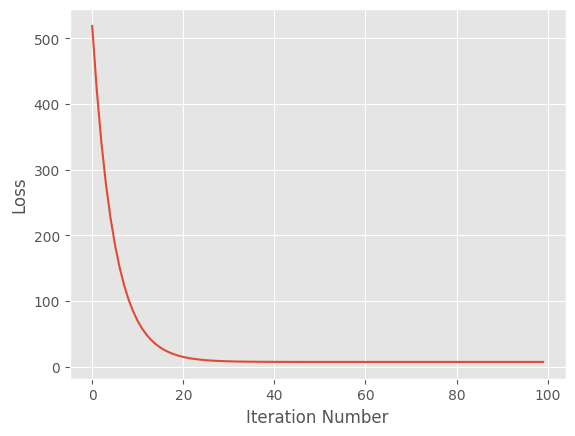

In [13]:
theta = train(x, y)

In [14]:
theta

array([-1.34460828, 31.95839224])

In [15]:
def predict(x, theta):
    return hypothesis(x, theta)

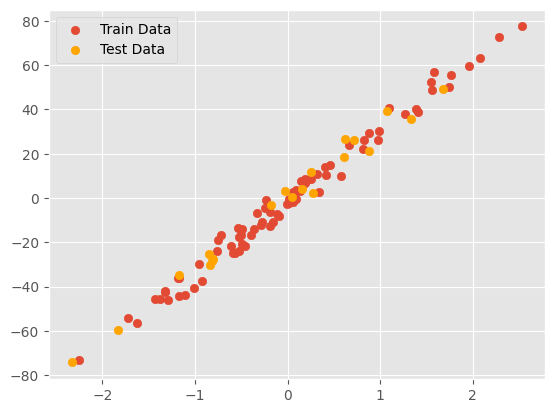

In [16]:
plt.scatter(XT, YT, label="Train Data")
plt.scatter(Xt, Yt, label="Test Data", color="orange")
plt.legend()
plt.show()

In [17]:
YP = predict(Xt, theta)

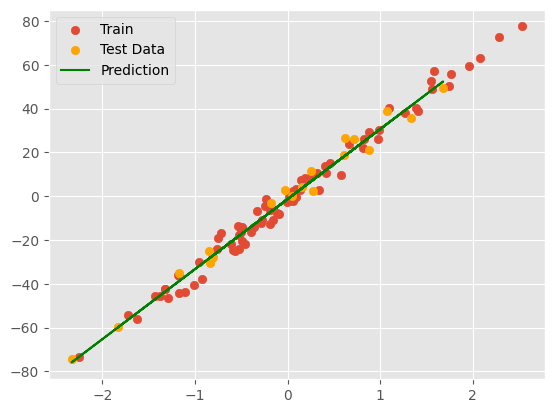

In [18]:
plt.scatter(XT, YT, label="Train")
plt.scatter(Xt, Yt, label="Test Data", color="orange")
plt.plot(Xt, YP, label="Prediction", color="green")
plt.legend()
plt.show()

In [19]:
# Model Evaluation
def r2Score(y, yp):
    ymean = y.mean()
    num = np.sum((y - yp) ** 2)
    denom = np.sum((y - ymean) ** 2)
    
    return 1 - num/denom

r2Score(Yt, YP)

0.9843768050725119

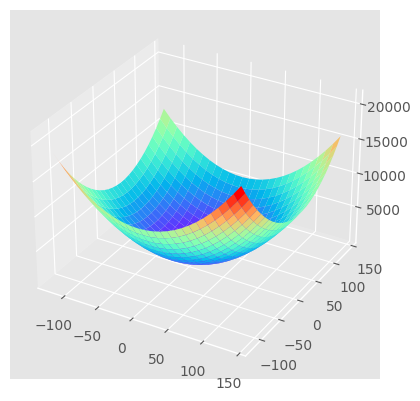

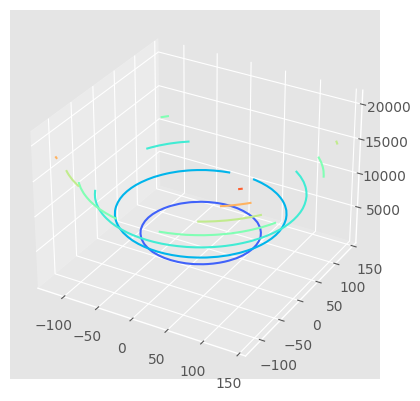

In [25]:
# Visualising the training process 
T0 = np.arange(-120,150,10)
T1 = np.arange(-120,150,10)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i,j]*x + T0[i,j]
        J[i,j] = np.mean((y-yp)**2)/2


fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()


In [39]:
# Trace the trajectory of gradient
def train(x, y, learning_rate = 0.1, maxItrs = 100):
    theta = np.array([-150, 150])
    error_list = []
    #Note down values of theta
    theta_list = []
    
    for i in range(maxItrs):
        grad = gradient(x, y, theta)
        error_list.append(error(x, y, theta))
        theta_list.append((theta[0], theta[1]))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
        
    return theta, theta_list, error_list

In [40]:
theta, theta_list, error_list = train(XT, YT)

In [41]:
theta_list = np.array(theta_list)

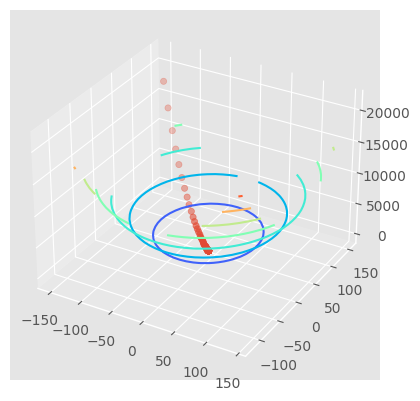

In [42]:
fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list) # theta_list[:,1] => all the rows in the 1th column
plt.show()

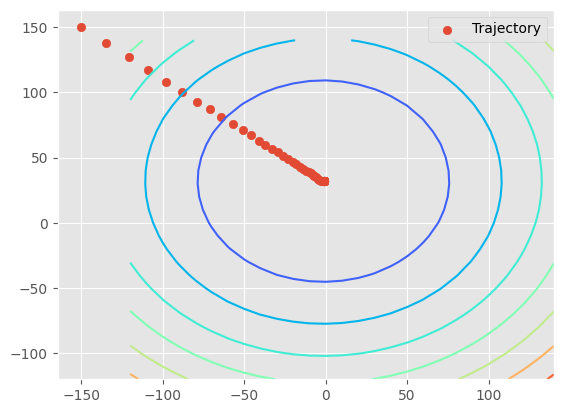

In [43]:
# 2D Contour Plot (Top View)
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1],label='Trajectory')
plt.legend()
plt.show()
